# Introduction to Logistic Regression

In [51]:
# Set up Notebook

%matplotlib inline

# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# We do this to ignore several specific warnings
import warnings
warnings.filterwarnings("ignore")

sns.set(style="white")


 In a binary classification process, we have two possible outcome, which we can label as Success or Failure. Denoting the probability of these outcomes as $P(S)$ and $P(F)$ respectively, we can write: 
 * the probability of susccess as $P(S) = p$,
 * probability of failure as $P(F) = 1 - p$ and
 * the odds of a successful outcome as 
 $$Odds(S) = \frac{p}{1-p}$$
 
 We can extend the framework of *linear regression* to the task of binary classification by employing a mapping between the continuous value predicted by a linear regressor and the probability of an event occurring, which is bounded by the range [0, 1]. Two functions do that:  `logit` function and `probit` function.

What `logit` and `probit` do, in essence, is take the linear model and feed it through a function to yield a nonlinear relationship.

The logit  -also known as logistic regression- is more popular in health sciences becasues coefficients can be interpreted in terms of odds ratios.
Probit models can be generalized to account for non-condtant error variances in more advanced econometric settings (known as heteroskedastic probit models) and hence are used in some contexts by economists and political scientists.

## Logit Function

The `logit function` is defined as the logarithm of the odds (i.e $p/(1-p)$), which is also known as the *log-odds*. Thus, the *logit* function can be written for a probability of success *p*:
 $$logit(p) = log(p/(p-1)),$$ where $$0\leq p \leq 1$$

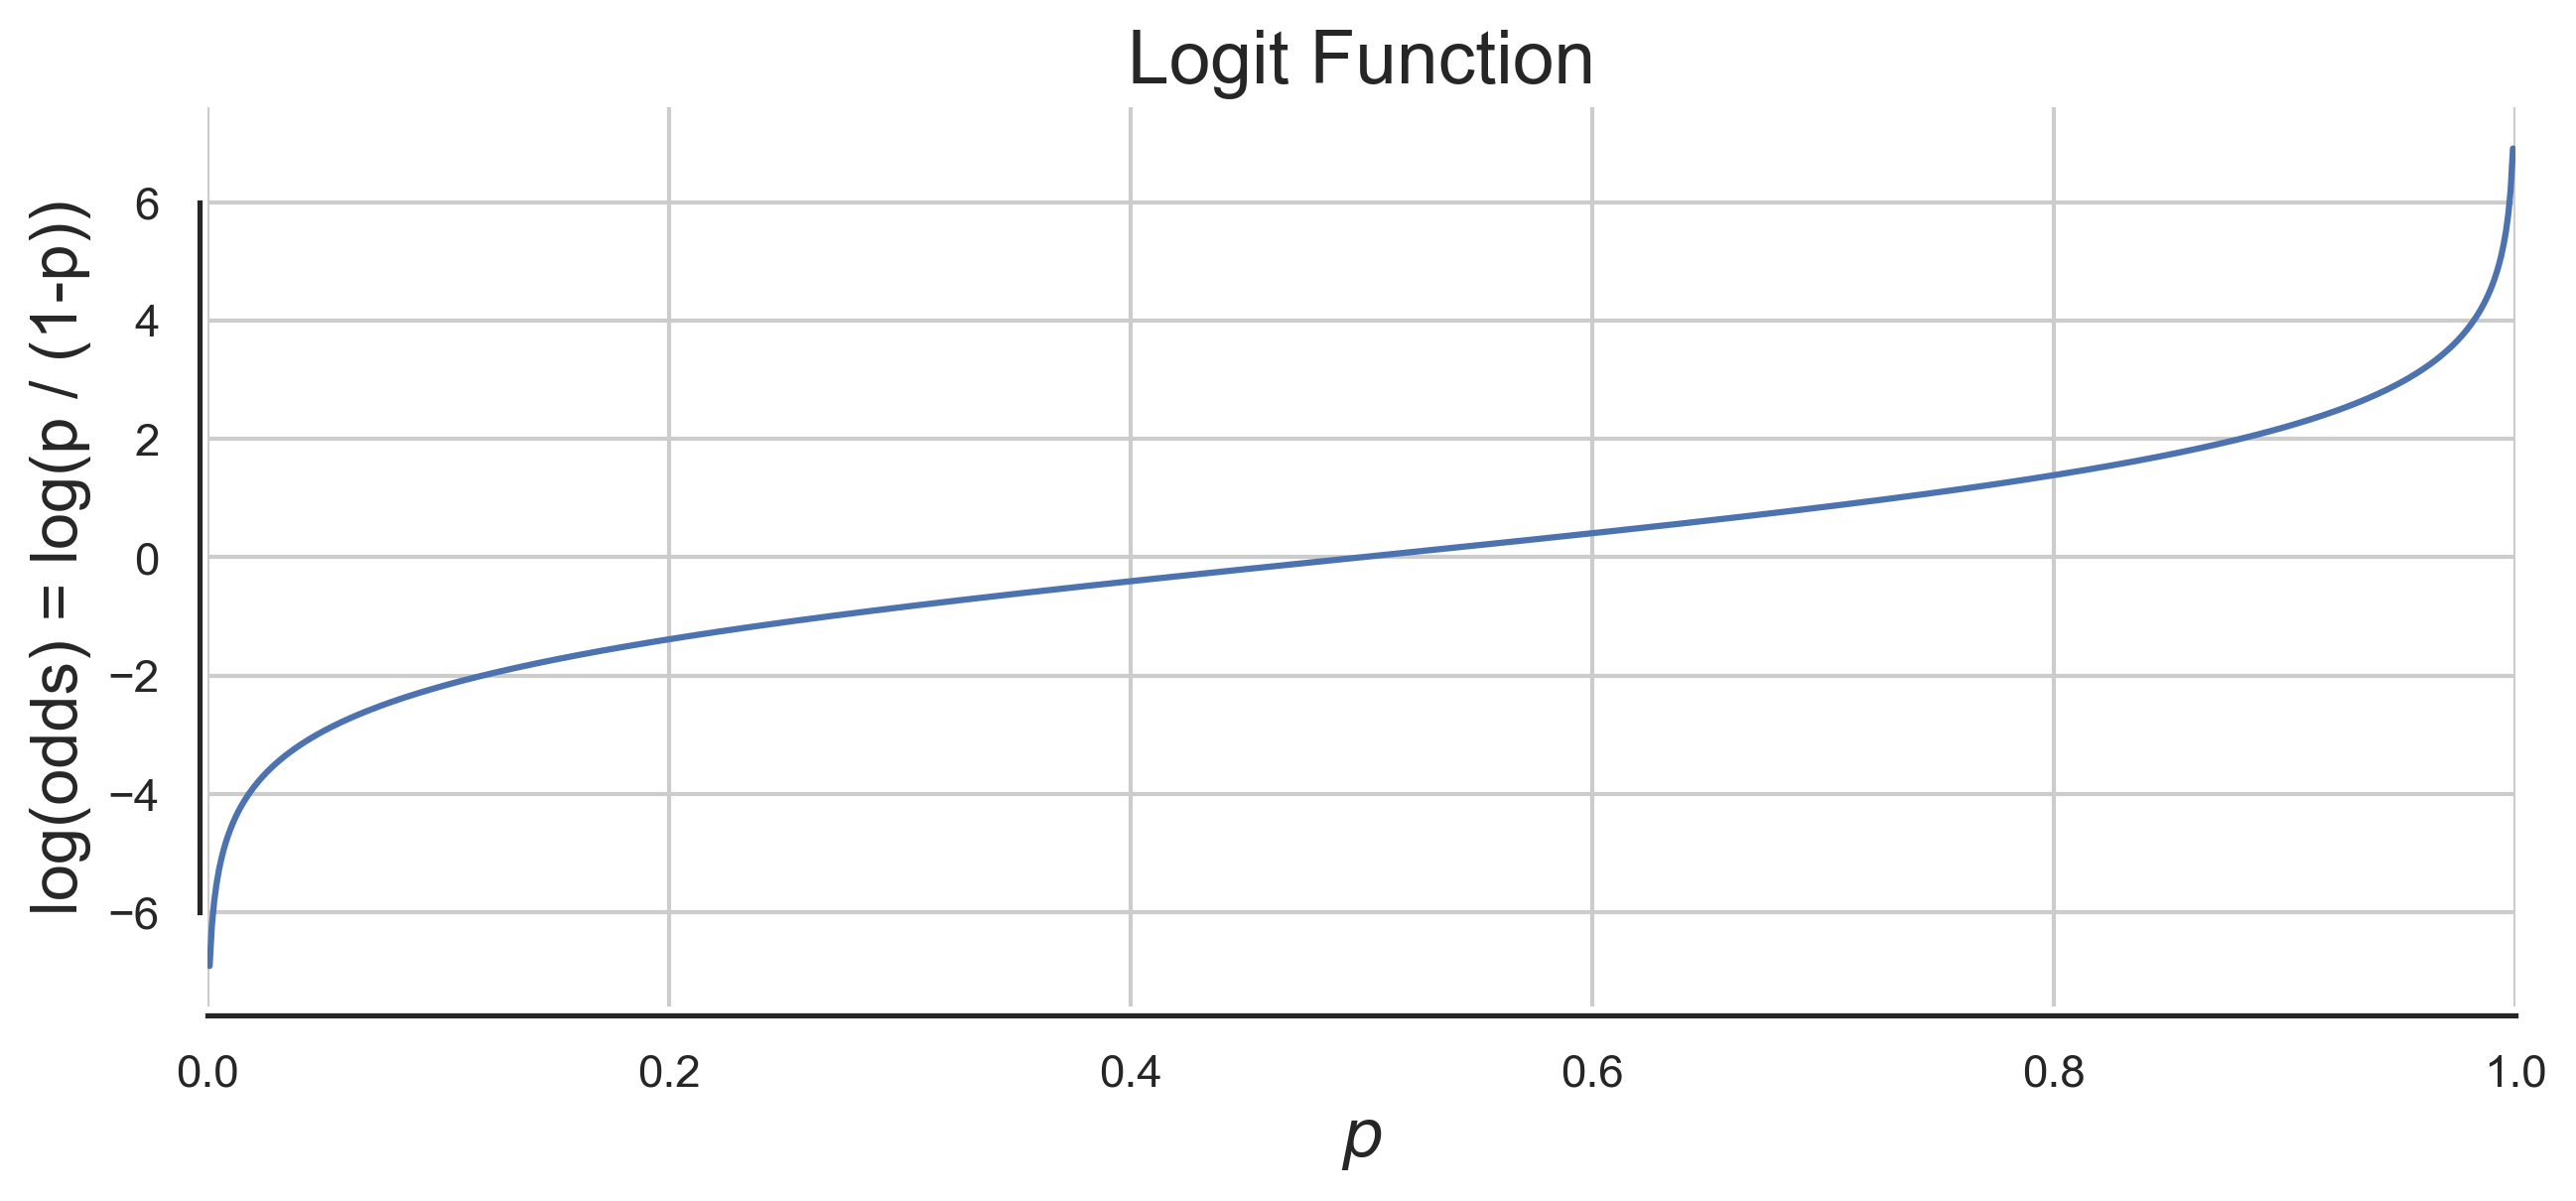

In [52]:
X_odds = np.arange(0.001, 1, 0.001)
plt.figure(figsize=(10, 4), dpi=300)
plt.xlim((0, 1))
plt.plot(X_odds, np.log(X_odds / (1 - X_odds)))
plt.xlabel("$p$", fontsize=16)
plt.ylabel("log(odds) = log(p / (1-p))", fontsize=16)
plt.title("Logit Function", fontsize=18)
sns.despine(offset = 2, trim=True)
plt.grid(True);

 We can invert this relationship to obtain the *logistic function*, which for a parameter $\alpha$ is defined by the following expression:

$\textrm{logit}^{-1}(\alpha) = \textrm{logistic}(\alpha) = \frac{1}{1 + \exp{(-\alpha})}$

While the logistic function is most commonly used to perform this type of regression, a related function is the _probit_ function, which stands for _probability unit_ and is sometimes used in lieu of the _logit_ function. The _probit_ function is defined for a probability of success, $p$:

$$\textrm{probit}(p) = \sqrt{2}\erf^{-1}(2p - 1),$$ 
where $0 \leq p \leq 1$, and $\erf$ is the Error Function.

The logit function (and the probit function) is an _S_ shaped curve that converts real numbers into a probability. Both the logit and probit functions are related to the _sigmoid_ function, but are centered at the origin (0, 0).


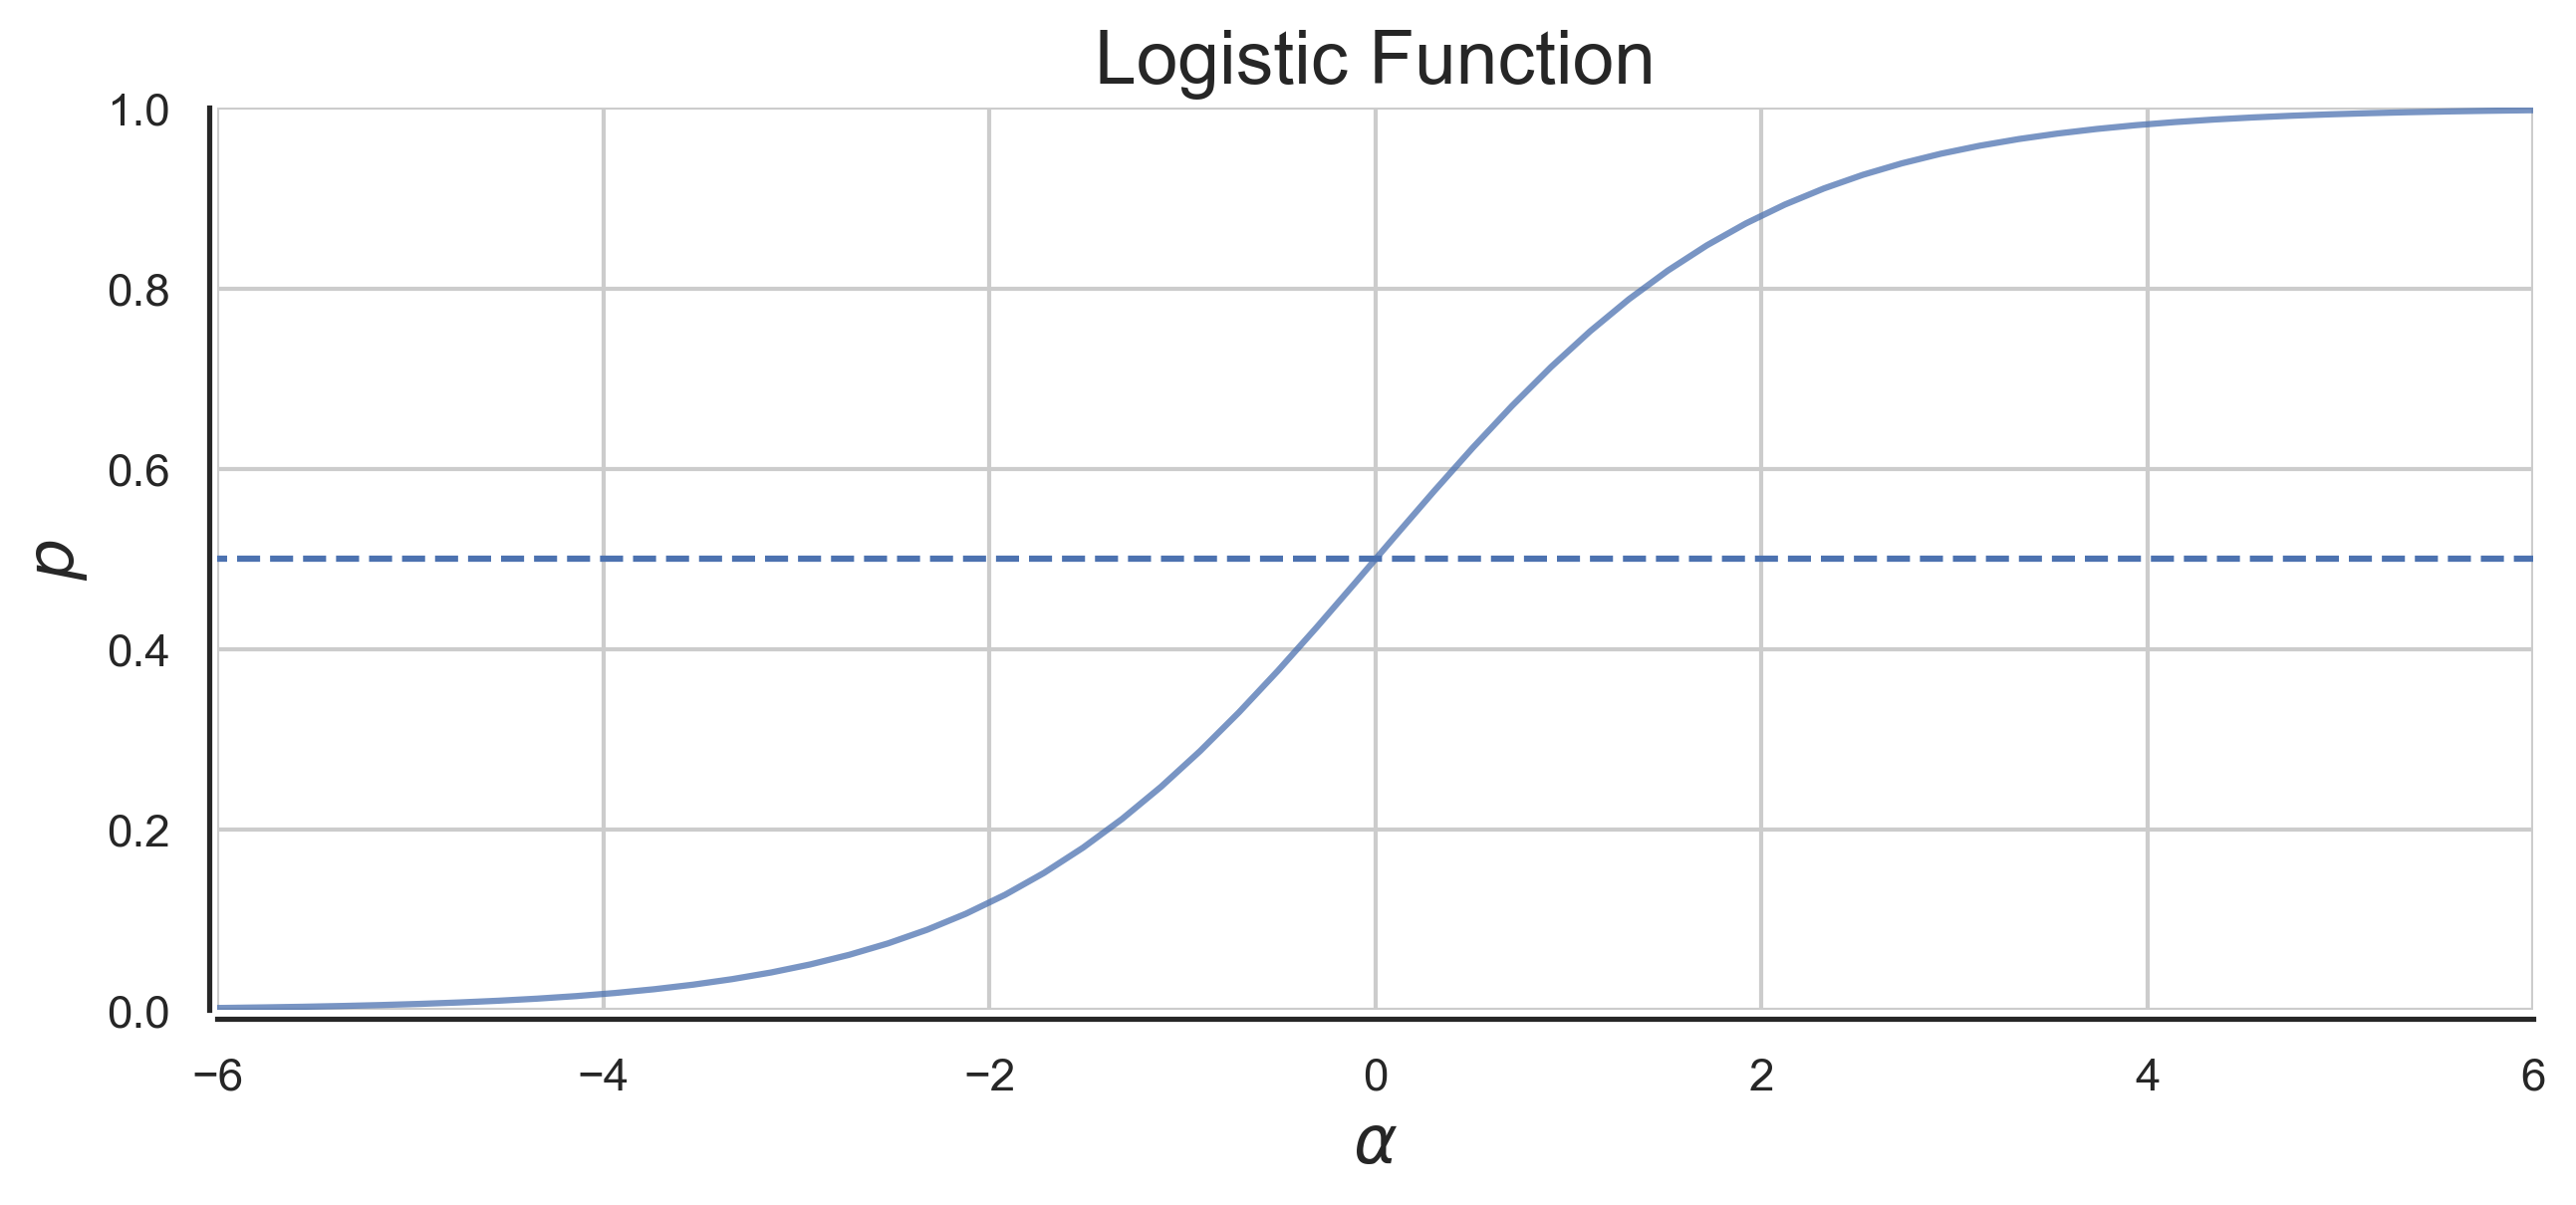

In [53]:
# create figure and axes
fig, ax = plt.subplots(figsize=(10,4), dpi=300)

# compute and plot logistic function
x = np.linspace(-10, 10, 100)
y = 1./(1+np.exp(-x))
ax.plot(x, y, alpha=0.75)

# Draw probability barrier
ax.hlines(0.5, -10, 10, linestyles='--')

# Decorate plot
ax.set_xlabel(r'$\alpha$', fontsize=16)
ax.set_ylabel(r'$p$', fontsize=16)
ax.set_title('Logistic Function', fontsize=18)
plt.xlim((-6, 6))
plt.ylim((0,1))
sns.despine(offset = 2, trim=True)
plt.grid(True);

## A Small Modelling Example

To get more familiar with logistic regression, let us take a look at the following example:

* X: an artificil feature value or independent value
* Y: a binomial outcome or dependent value

Both randomly generated.

In [60]:
from scipy.stats import norm
np.random.seed(3)

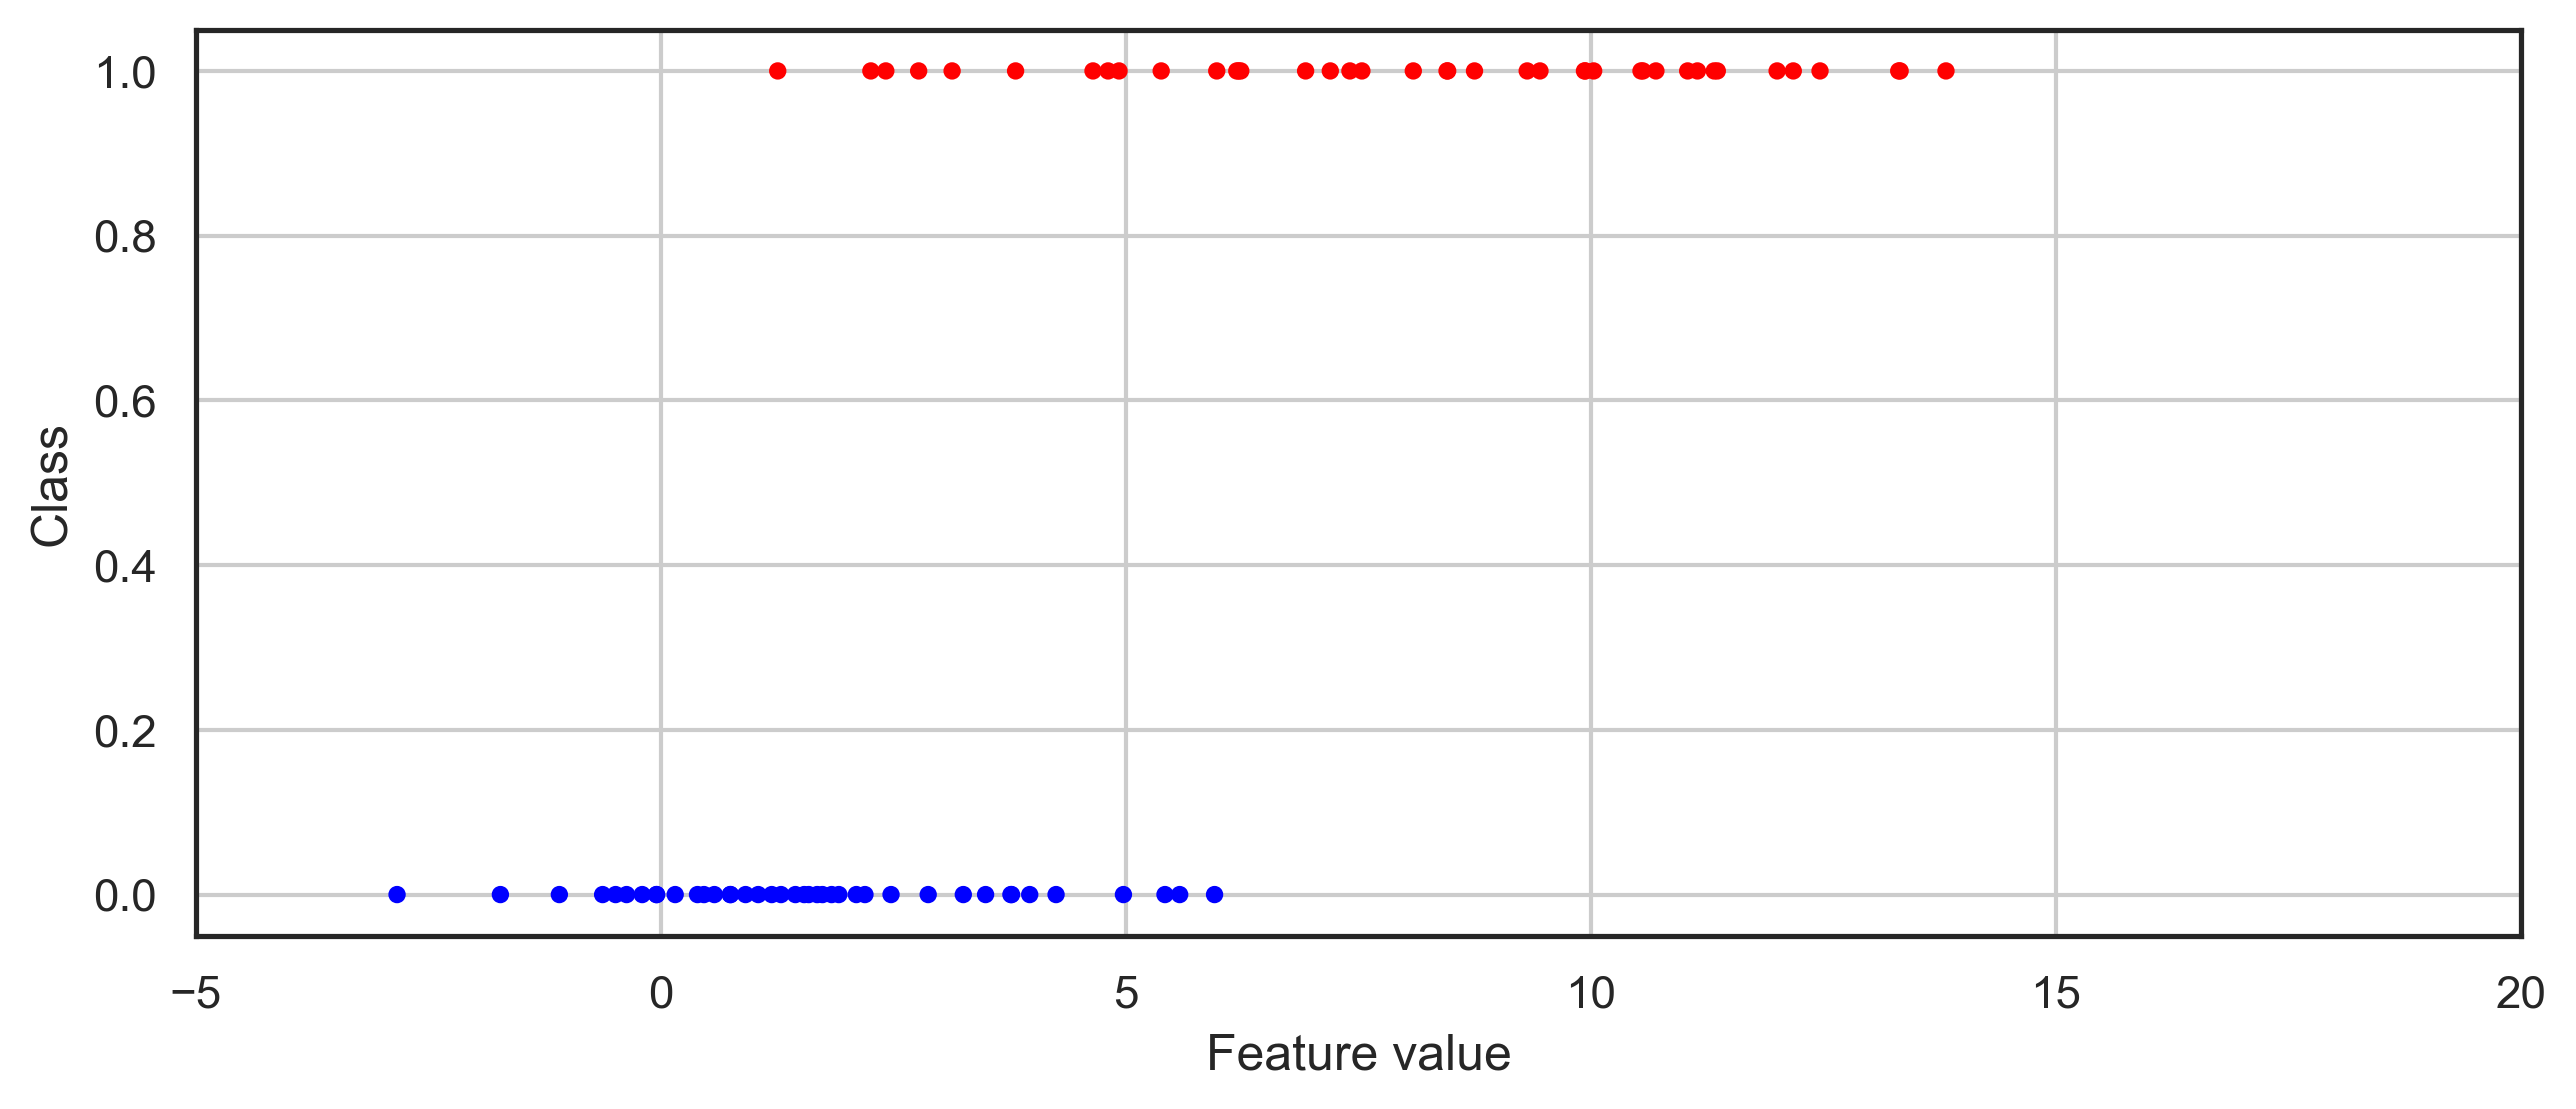

In [61]:
NUM_PER_CLASS = 40
X_log = np.hstack((norm.rvs(2, size=NUM_PER_CLASS, scale=2), norm.rvs(8, size=NUM_PER_CLASS, scale=3)))
y_log = np.hstack((np.zeros(NUM_PER_CLASS), np.ones(NUM_PER_CLASS))).astype(int)

plt.figure(figsize=(10, 4), dpi=300)
plt.grid(True)

plt.xlim((-5, 20))
plt.scatter(X_log, y_log, c=np.array(['blue', 'red'])[y_log], s=10)
plt.xlabel("Feature value")
plt.ylabel("Class");

As we can see in the figure above, the data is so noisy that classes overlap in the feature value range between 1 and 6. Therefore, it is better to not directly model the discrete classes, but rather the _probability_ that a **feature value** belongs to a class 1, $P(X)$.

Let's say a feature has the probability of 0.9 that it belongs to class1, that is, $P(y=1) = 0.9$.
The odds ratio (OR) is then 
$$\frac{P(y=1)}{P(y=0)} = \frac{0.9}{0.1} = 9$$

Which means that the chance is 9:1 that this feature maps to class 1.
We can infer that the OR is bounded by 0, but goes to infinity. If also we take the logarithm of it, we can map all probabilities between 0 and 1 to real numbers.

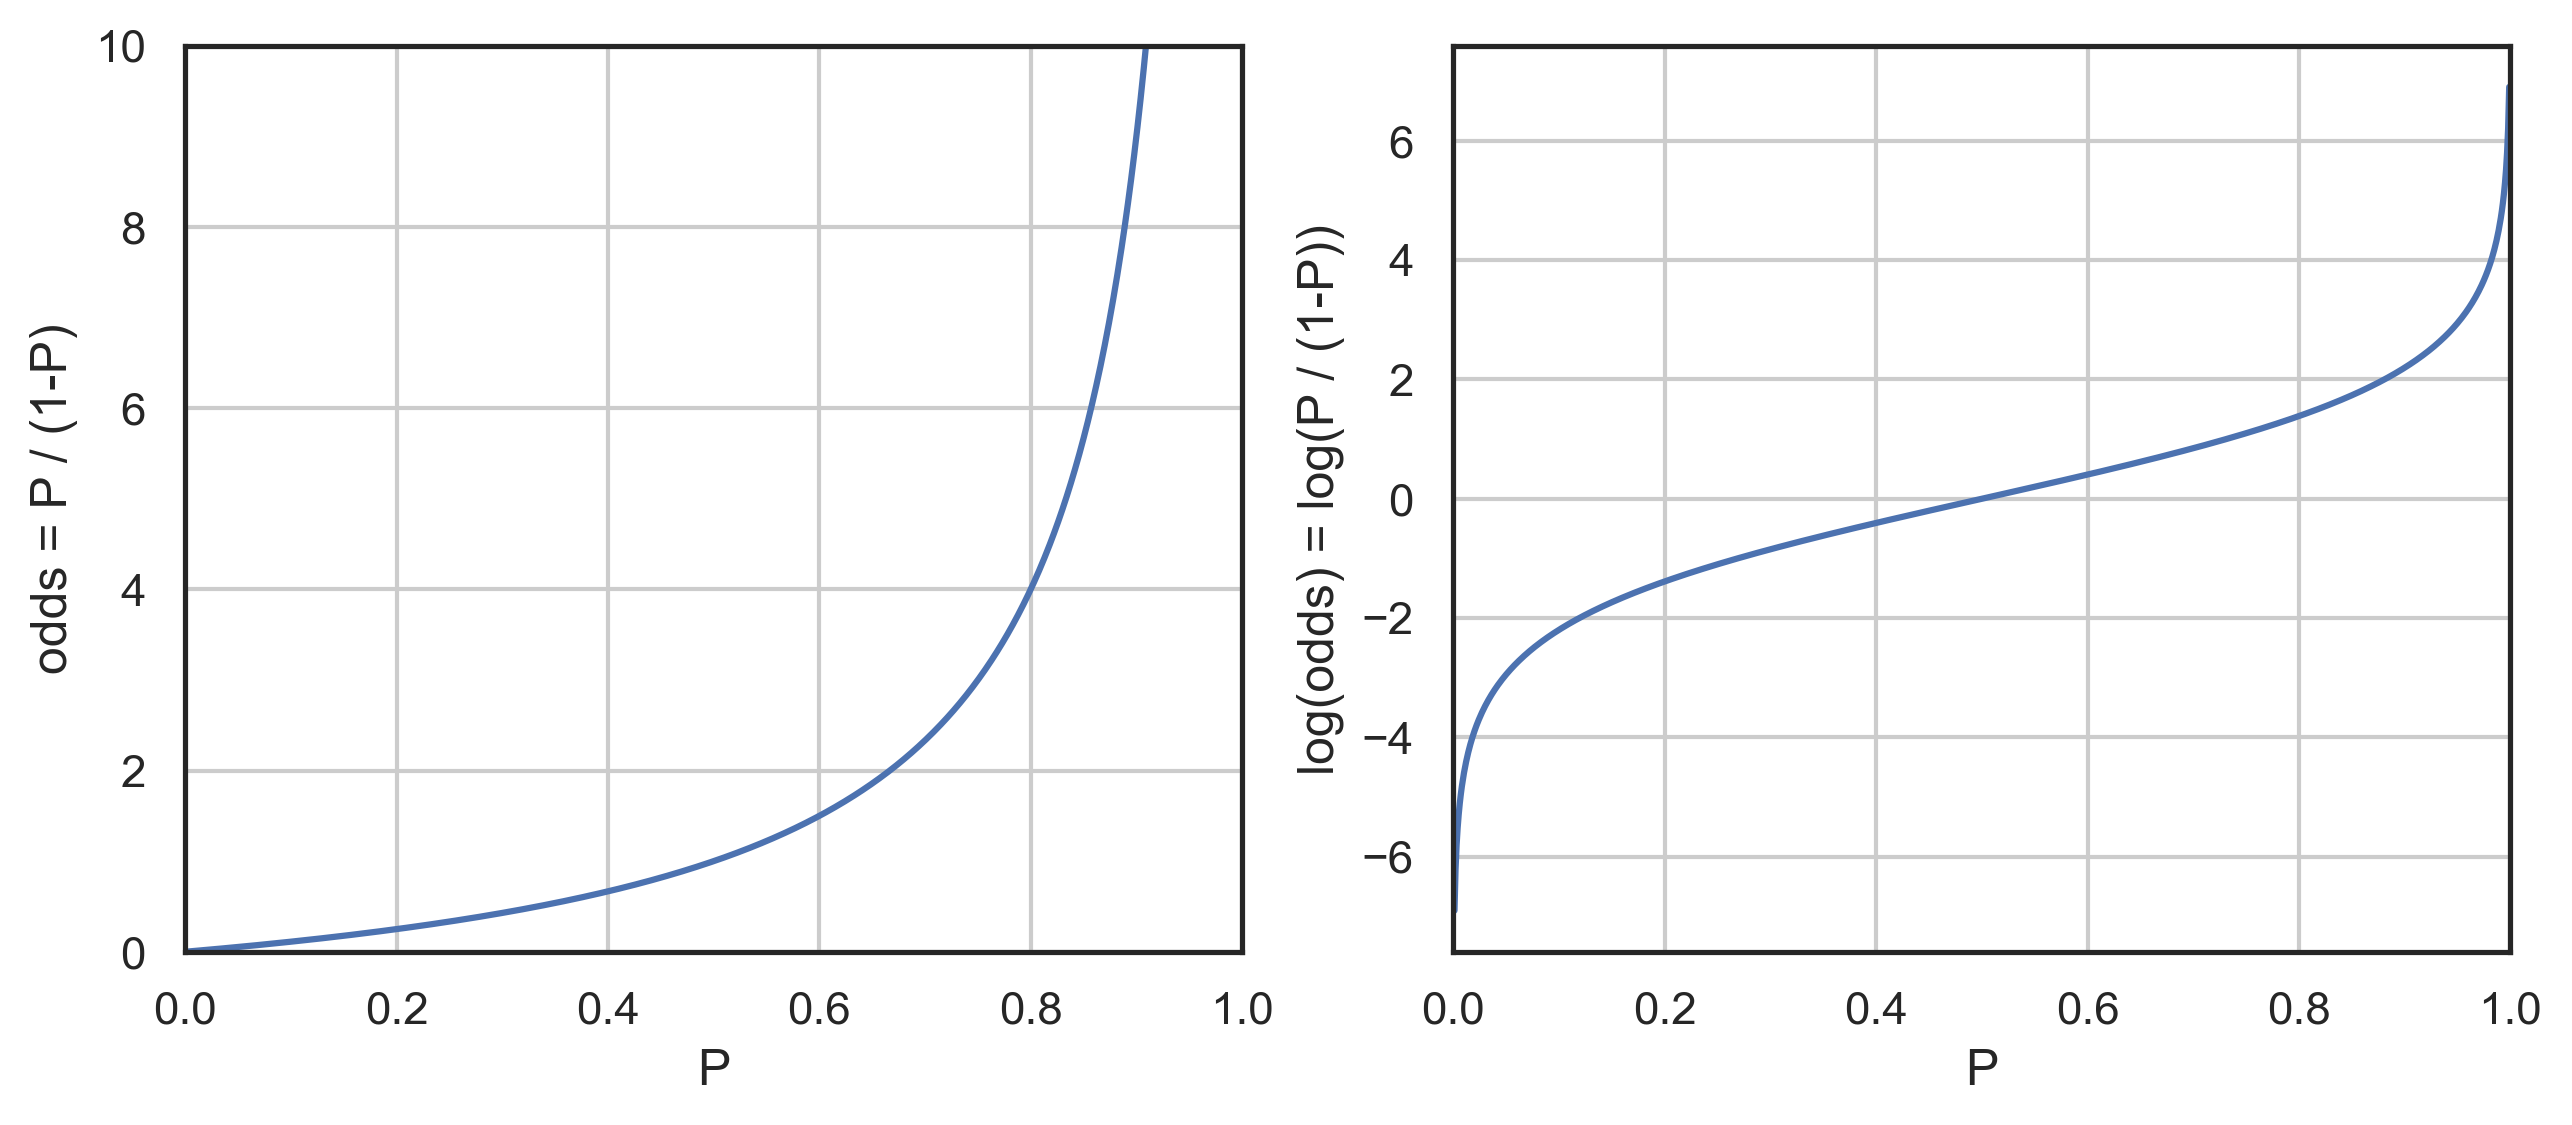

In [62]:
X_odds = np.arange(0.001, 1, 0.001)
plt.figure(figsize=(10, 4), dpi=300)
plt.subplot(1, 2, 1)
plt.xlim((0, 1))
plt.ylim((0, 10))
plt.plot(X_odds, X_odds / (1 - X_odds))
plt.xlabel("P")
plt.ylabel("odds = P / (1-P)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.xlim((0, 1))
plt.plot(X_odds, np.log(X_odds / (1 - X_odds)))
plt.xlabel("P")
plt.ylabel("log(odds) = log(P / (1-P))")
plt.grid(True);

The next figures show what the above log(odds) function consists of:

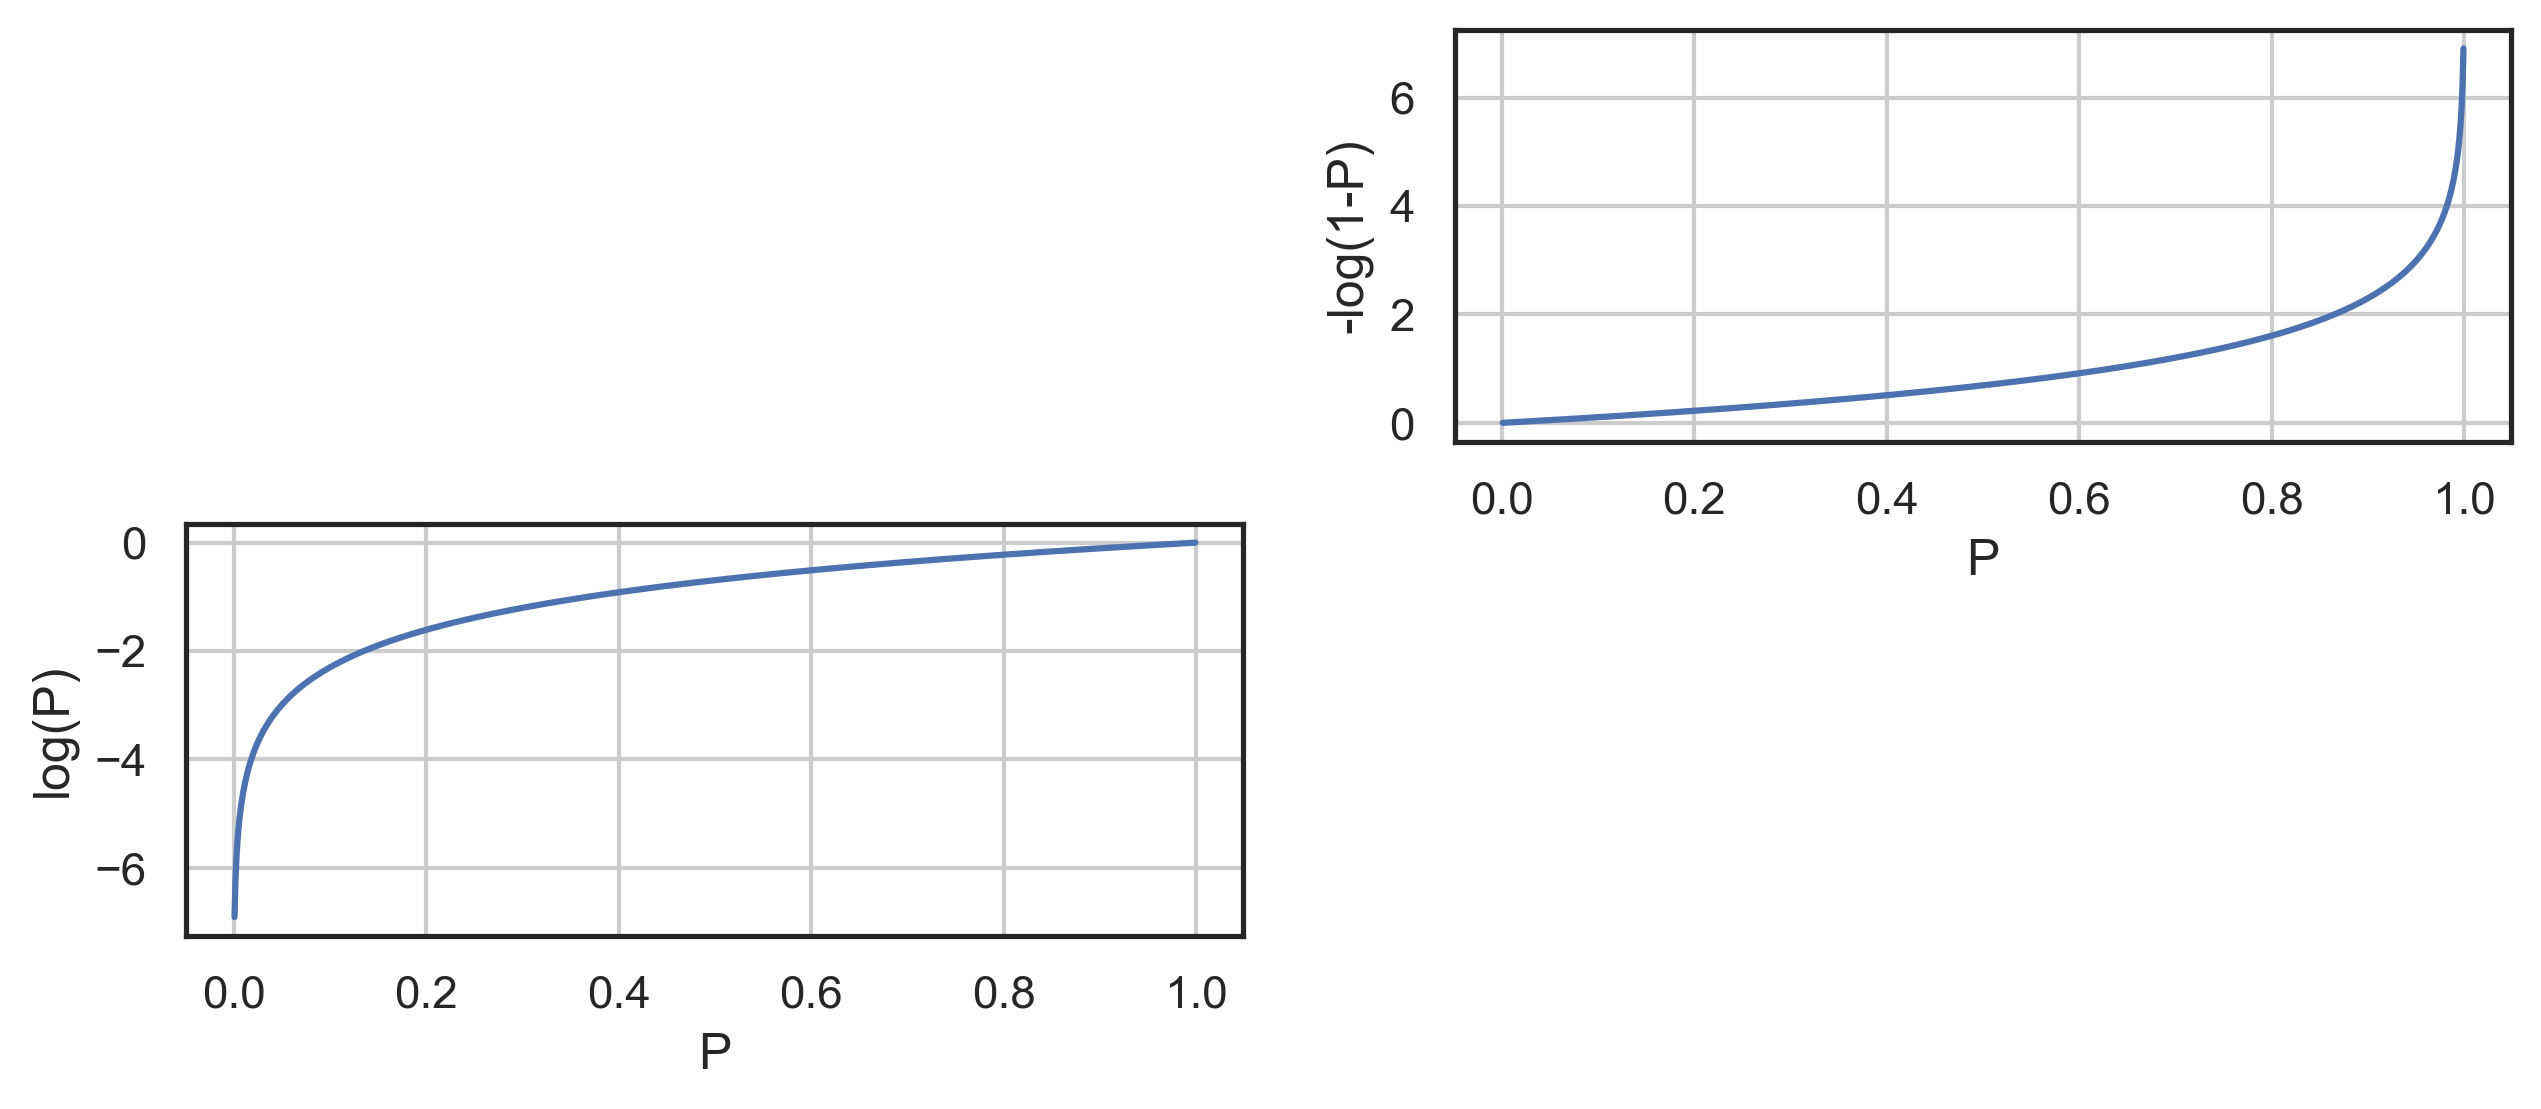

In [63]:
plt.figure(figsize=(10, 4), dpi=300)
plt.subplot(2, 2, 3)
plt.plot(X_odds, np.log(X_odds))
plt.xlabel("P")
plt.ylabel("log(P)")
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(X_odds, -np.log(1 - X_odds))
plt.xlabel("P")
plt.ylabel("-log(1-P)")
plt.grid(True)

Let's consider now the following linear function:
$$y_i = c_0 + c_1x_i$$

where $c_0$ and $c_1$ are the intercept and the slope, respectively.

Since $y_i$ is $p \in \{0, 1\}$ we can write it as follows:

$$log\bigg(\frac{p_i}{1-p_i}\bigg) = c_0 + c_1x_i$$

and so we can solve the equation for $p_i$ as follows:

$$p_i = \frac{1}{1 + e^{-(c_0 + c_1x_i)}}$$

In [64]:
logclf = LogisticRegression()
logclf.fit(X_log.reshape(NUM_PER_CLASS * 2, 1), y_log)
print(np.exp(logclf.intercept_), np.exp(logclf.coef_.ravel()))

[0.03518544] [2.17570283]


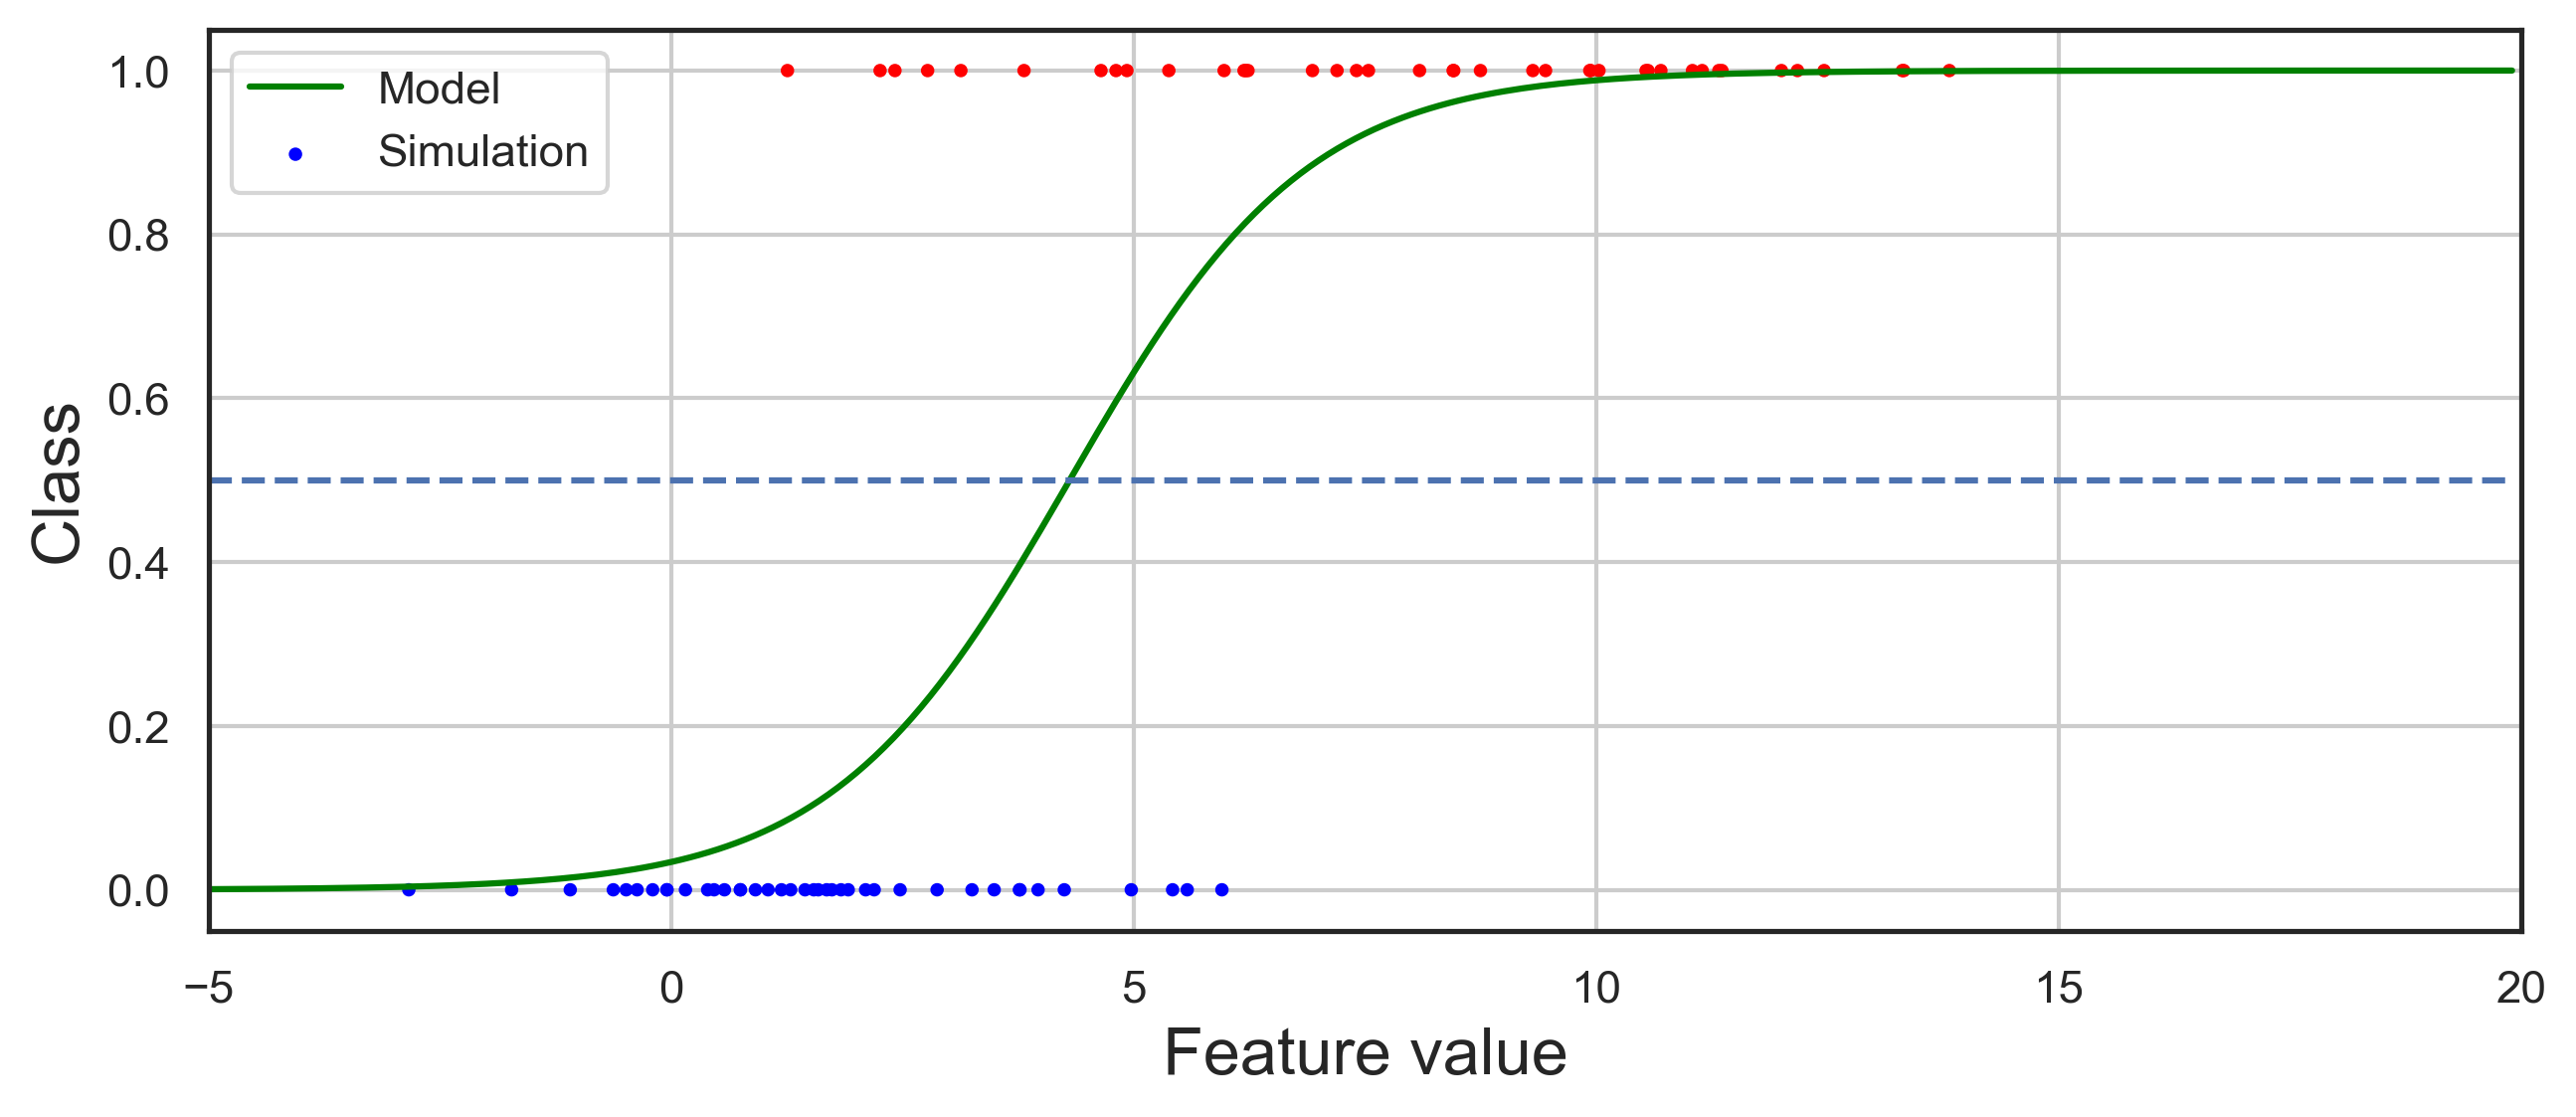

In [65]:
X_range = np.arange(-5, 20, 0.1)
y = 1.0 / (1.0 + np.exp(-(logclf.intercept_ + logclf.coef_ * X_range)))

plt.figure(figsize=(10, 4), dpi=300)
plt.xlim((-5, 20))
plt.scatter(X_log, y_log, c=np.array(['blue', 'red'])[y_log], s=5, label='Simulation')
plt.plot(X_range, y.ravel(), c='green', label='Model')
plt.plot(X_range, np.ones(X_range.shape[0]) * 0.5, "--")
plt.xlabel("Feature value", fontsize=16)
plt.ylabel("Class", fontsize=16)
plt.legend()
plt.grid(True)

In [73]:
logclf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}